# Hotel Data

## Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats # for t-test and ANOVA
from scipy.stats import kurtosis, skew
import statsmodels.stats.weightstats as weightstats # for z-test (test of means)
import statsmodels.stats.proportion as proportion # for z-test (test of proportions)
import statsmodels.stats.multicomp as multi  #used for tukey-hsd
from sklearn.preprocessing import QuantileTransformer
import math

## Data

In [2]:
df=pd.read_csv("Hotel Data.csv")

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [5]:
df.shape

(119390, 32)

In [6]:
(df['reserved_room_type'].value_counts())

A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64

In [7]:
(df['assigned_room_type'].value_counts())

A    74053
D    25322
E     7806
F     3751
G     2553
C     2375
B     2163
H      712
I      363
K      279
P       12
L        1
Name: assigned_room_type, dtype: int64

### Add columns

#### reserved_assigned

Add 'reserved_assigned':

Look at whether customers received the room they reserved or were assigned a different room type.

True = reserved_room_type == assigned_room_type
False = reserved_room_type != assigned_room_type

In [8]:
df['reserved_assigned'] = df['reserved_room_type']==df['assigned_room_type']

#### total_stay

Find total length of stay by adding week and weekend nights

In [9]:
df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

#### revenue

Find revenue by multiply total stay by adr (average day rate)

In [10]:
df['revenue'] = df['total_stay'] * df['adr']

# ADR vs Room Type

Hypothesis: Revenue of hotels would increase if customers were assigned reserved rooms

### Average ADR

#### reserved room types

In [11]:
df.groupby('reserved_room_type')['adr'].mean()

reserved_room_type
A     90.796658
B     90.360447
C    160.216792
D    120.682882
E    124.540179
F    167.689651
G    175.996027
H    188.223111
L    124.666667
P      0.000000
Name: adr, dtype: float64

#### assigned room types

In [12]:
a_mean = df.groupby('assigned_room_type')['adr'].mean()

print(a_mean)

assigned_room_type
A     93.142347
B     94.450264
C    113.423583
D    107.453633
E    117.704224
F    151.889931
G    166.530309
H    171.380772
I     40.843774
K     53.698889
L      8.000000
P      0.000000
Name: adr, dtype: float64


In [13]:
adr_by_room_type = a_mean.to_dict()

In [14]:
adr_by_room_type

{'A': 93.1423468326739,
 'B': 94.45026352288488,
 'C': 113.42358315789474,
 'D': 107.45363280941474,
 'E': 117.70422367409685,
 'F': 151.88993068515063,
 'G': 166.53030943987466,
 'H': 171.38077247191012,
 'I': 40.84377410468319,
 'K': 53.69888888888889,
 'L': 8.0,
 'P': 0.0}

### Potential Revenue

#### Filter relevant rows + columns

- Filter to only include rows in which customers where not assigned the room type they reserved
- Filter to retain only relevant columns

In [15]:
df2 = df[df['reserved_assigned'] == False]

In [16]:
columns_to_keep = ['hotel','reserved_room_type','assigned_room_type','reserved_assigned','total_stay','adr','revenue']

df2 = df2.loc[:, columns_to_keep]

#### Potential revenue

Calculate potential revenue by applying average adr to reserved room type. Then find different between pr and r.

In [17]:
def calculate_potential_revenue(row):
    assigned_room = row['reserved_room_type']
    revenue = row['revenue']
    total_stay = row['total_stay']
    
    new_adr = adr_by_room_type.get(assigned_room, 0)
    potential_revenue = new_adr * total_stay
    revenue_difference = potential_revenue - revenue
    
    return pd.Series([potential_revenue, revenue_difference], index=['potential_revenue', 'revenue_difference'])
    
df2[['potential_revenue', 'revenue_difference']] = df2.apply(calculate_potential_revenue, axis=1)

#### Potential profit

Find out if potential revenue(pr) is larger than current revenue(r)

True = pr > r
False = pr !> r

In [18]:
df2['potential_profit'] = df2['potential_revenue'] > df2['revenue']

In [19]:
df2.head()

,hotel,reserved_room_type,assigned_room_type,reserved_assigned,total_stay,adr,revenue,potential_revenue,revenue_difference,potential_profit
2,Resort Hotel,A,C,False,1,75.00,75.00,93.142347,18.142347,True
12,Resort Hotel,D,E,False,4,97.00,388.00,429.814531,41.814531,True
15,Resort Hotel,D,E,False,4,97.00,388.00,429.814531,41.814531,True
17,Resort Hotel,A,E,False,1,88.20,88.20,93.142347,4.942347,True
18,Resort Hotel,A,G,False,1,107.42,107.42,93.142347,-14.277653,False


In [20]:
df2['potential_profit'].value_counts()

True     9515
False    5402
Name: potential_profit, dtype: int64

In [21]:
df['reserved_assigned'].value_counts()

True     104473
False     14917
Name: reserved_assigned, dtype: int64

In [22]:
sum_r = round(sum(df2['revenue']),2)
sum_pr = round(sum(df2['potential_revenue']),2)
diff = round(abs(sum_r - sum_pr),2)

print("Current total revenue is " + str(sum_r))
print("Potential total revenue is " + str(sum_pr))
print("Difference of " + str(diff))

Current total revenue is 3510294.4
Potential total revenue is 4021700.69
Difference of 511406.29


There's a potential to increase profit if customers were assigned their reserved rooms. In a majority of the case, the difference is positive.

Hypothesis is true.

### Analsysis of Median ADR Room Type

Find median of average adr by room type:

In [23]:
a_mean.sort_values(ascending=True)

assigned_room_type
P      0.000000
L      8.000000
I     40.843774
K     53.698889
A     93.142347
B     94.450264
D    107.453633
C    113.423583
E    117.704224
F    151.889931
G    166.530309
H    171.380772
Name: adr, dtype: float64

In [24]:
a_mean.sort_values(ascending=True)[6]

107.45363280941474

Room type of median adr: D

#### Assigned Room Type D comparison

rr - reserved room
ar - assigned room

Sort of df into 3 groups:
- dd = rr = ar
- hd = rr != ar (higher adr rooms)
- ld = rr!= ar (lower adr rooms)

In [25]:
dd = []
hd = []
ld = []

hr = ['C', 'E', 'F', 'G', 'H']

for index, row in df.iterrows():
    if row['reserved_room_type'] == row['assigned_room_type']:
        dd.append(row['adr'])
        if row['reserved_room_type'] in hr:
            hd.append(row['adr'])
        else:
            ld.append(row['adr'])


In [26]:
dd = []
hd = []
ld = []

hr = ['C', 'E', 'F', 'G', 'H']

for i, row in df.iterrows():
    if row['reserved_room_type'] == row['assigned_room_type']:
        dd.append(row['adr'])
        if row['reserved_room_type'] in hr:
            hd.append(row['adr'])
        else:
            ld.append(row['adr'])

In [27]:
print('Number of values in dd: ' + str(len(dd)))
print('Number of values in hd: ' + str(len(hd)))
print('Number of values in ld: ' + str(len(ld)))

Number of values in dd: 104473
Number of values in hd: 12138
Number of values in ld: 92335


In [28]:
mean_value = np.mean(dd)
median_value = np.median(dd)
min_value = np.min(dd)
max_value = np.max(dd)
std_value = np.std(dd)
var_value = np.var(dd)

print("DD")
print("Mean:", mean_value)
print("Median:", median_value)
print("Min:", min_value)
print("Max:", max_value)
print("Standard Deviation:", std_value)
print("Variance:", var_value)

mean_value = np.mean(hd)
median_value = np.median(hd)
min_value = np.min(hd)
max_value = np.max(hd)
std_value = np.std(hd)
var_value = np.var(hd)

print("")
print("HD")
print("Mean:", mean_value)
print("Median:", median_value)
print("Min:", min_value)
print("Max:", max_value)
print("Standard Deviation:", std_value)
print("Variance:", var_value)

mean_value = np.mean(ld)
median_value = np.median(ld)
min_value = np.min(ld)
max_value = np.max(ld)
std_value = np.std(ld)
var_value = np.var(ld)

print("")
print("LD")
print("Mean:", mean_value)
print("Median:", median_value)
print("Min:", min_value)
print("Max:", max_value)
print("Standard Deviation:", std_value)
print("Variance:", var_value)

DD
Mean: 104.46886104543756
Median: 96.0
Min: 0.0
Max: 5400.0
Standard Deviation: 50.363316628974104
Variance: 2536.4636618702993

HD
Mean: 149.89091613115835
Median: 148.35000000000002
Min: 0.0
Max: 451.5
Standard Deviation: 69.47852220958265
Variance: 4827.265048427469

LD
Mean: 98.4978543347593
Median: 93.6
Min: 0.0
Max: 5400.0
Standard Deviation: 43.91418340216929
Variance: 1928.455503879361


Customers who reserved a higher priced room type will pay a lot more for the same room type. 
Customers who reserved a lower priced room type will pay a bit less for the same room type.

#### One Sampe Z-Test

Validate previous conclusion on mean price for different customers

Hypothesis:
Test that the mean adr of customers who reserved and were assigned room type D is equal to those who reserved a different room and were assigned to type D

Null Hypothesis: 𝜇=𝜇0
Alternative: 𝜇≠𝜇0

In [29]:
alpha_value = 0.05
pop_mean = np.mean(dd)

(test_statistic, p_value) = weightstats.ztest(hd, value=pop_mean, alternative='two-sided', ddof=1.0)

print("The test statistic is: ", round(test_statistic,3))
print("The p-value is: ", round(p_value,3))

if p_value < alpha_value:
    print("At",alpha_value, "level of significance, we reject null hypothesis.")
else:
    print("At",alpha_value, "level of significance, we failed to reject null hypothesis.")

The test statistic is:  72.023
The p-value is:  0.0
At 0.05 level of significance, we reject null hypothesis.


In [30]:
alpha_value = 0.05
pop_mean = np.mean(dd)

(test_statistic, p_value) = weightstats.ztest(ld, value=pop_mean, alternative='two-sided', ddof=1.0)

print("The test statistic is: ", round(test_statistic,3))
print("The p-value is: ", round(p_value,3))

if p_value < alpha_value:
    print("At",alpha_value, "level of significance, we reject null hypothesis.")
else:
    print("At",alpha_value, "level of significance, we failed to reject null hypothesis.")

The test statistic is:  -41.317
The p-value is:  0.0
At 0.05 level of significance, we reject null hypothesis.


Conclusion: customers who reserved a different room type regardless of price end up paying a different price than those that reserved for this room type.

#### Room Type D

In [31]:
df3 = df[df['assigned_room_type'] == 'D']

/var/folders/s9/l42xsxx568z1smyl175jpx740000gn/T/ipykernel_1665/2530352496.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3['adr'], fit=stats.norm, kde=False, bins=500)


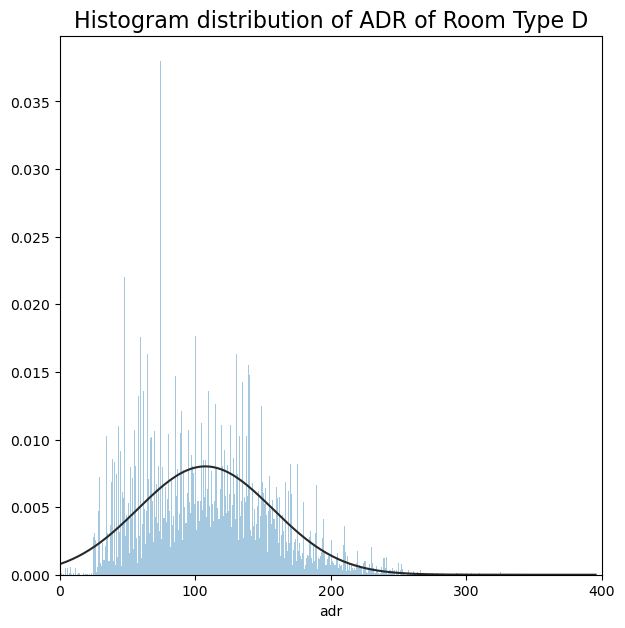

In [32]:
plt.rcParams["figure.figsize"] = [7,7]
sns.distplot(df3['adr'], fit=stats.norm, kde=False, bins=500)
sns.set_context("notebook", font_scale=1.5, rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 
plt.title('Histogram distribution of ADR of Room Type D')
plt.xlim(0,400)
plt.show();

In [33]:
data_kurtosis = kurtosis(df3['adr'])
data_skewness = skew(df3['adr'])

print("Kurtosis:", data_kurtosis)
print("Skewness:", data_skewness)


Kurtosis: 0.1270851623589988
Skewness: 0.44156044404420286


In [34]:
# Define function for comparing two plots
def compare_plot(feature, transformed_feature):
    plt.rcParams["figure.figsize"] = 13,5
    fig,ax = plt.subplots(1,2)

    stdDev = np.round(np.std(feature)[0],4) # for normal distribution, standard deviation is 1
    skewness = np.round(skew(feature),4) # for normal distribution, skewness = 0
    excess_kurtosis = np.round(kurtosis(feature),4) # for normal distribution, excess kurtosis = 0
    sns.histplot(feature, kde=True, ax=ax[0], legend=False)
    ax[0].set_xlabel(feature.columns[0])
    ax[0].set_title("ORIGINAL \n Standard Dev.: {0} \n Skewness: {1} \n Kurtosis: {2}".format(stdDev, skewness, excess_kurtosis));

    transformed_stdDev = np.round(np.std(transformed_feature)[0],4)
    transformed_skewness = np.round(skew(transformed_feature),4)
    transformed_excess_kurtosis = np.round(kurtosis(transformed_feature),4)
    sns.histplot(transformed_feature, kde=True, ax=ax[1], legend=False)
    ax[1].set_xlabel(feature.columns[0])
    ax[1].set_title("TRANSFORMED \n Standard Dev.: {0} \n Skewness: {1} \n Kurtosis: {2}".format(transformed_stdDev, transformed_skewness, transformed_excess_kurtosis));

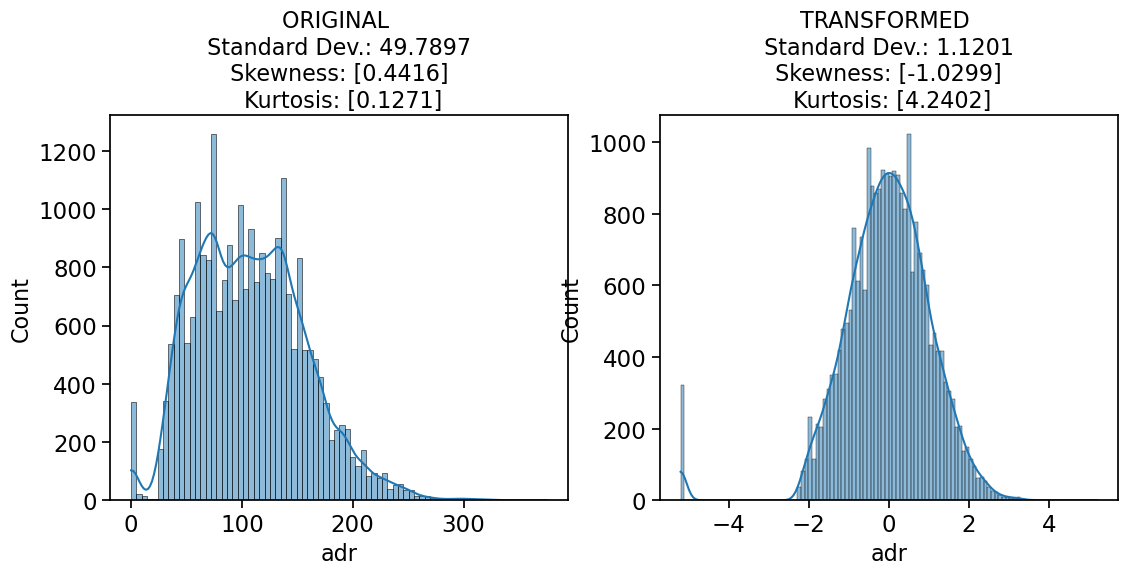

In [35]:
# Select feature
feature = df3[["adr"]] # in series

# Transformation
quantile = QuantileTransformer(output_distribution='normal', n_quantiles=10000) # with gaussian output
quantile.fit(feature) # to avoid data leakage, only fit to training data
transformed_feature = quantile.transform(feature) # then perform transform on both training data and test data.
transformed_feature = pd.DataFrame(transformed_feature)

# Plot
compare_plot(feature,transformed_feature)

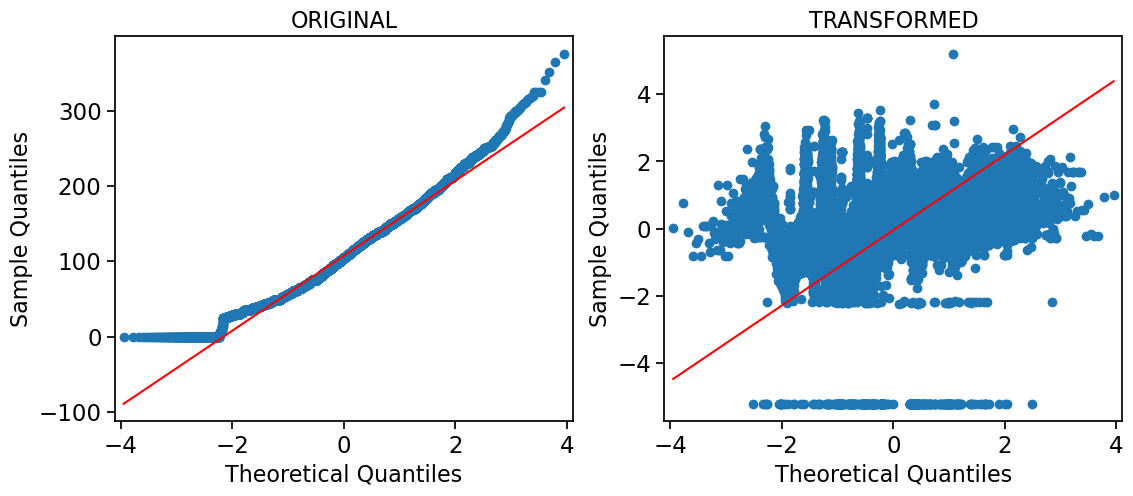

In [36]:
import statsmodels.api as sm

fig, ax = plt.subplots(1,2,figsize=(13, 5))
qq = sm.qqplot(df3["adr"], line='s', ax=ax[0])
ax[0].set_title("ORIGINAL")

qq = sm.qqplot(transformed_feature, line='s', ax=ax[1])
ax[1].set_title("TRANSFORMED")
plt.show();

#### Chi-squared Test 

- goodness of fit test
- check the distribution of room types

In [37]:
sample_percent = 0.2
alpha_value = 0.05
random_seed = 123

Filter out assigned room type L and P as there not enough counts of these room types.

In [38]:
df = df[df['assigned_room_type']!='L']
df = df[df['assigned_room_type']!='P']

In [39]:
total_count = df["assigned_room_type"].count()

grpA = df.groupby("assigned_room_type").get_group("A")
pA = grpA["assigned_room_type"].count()/total_count

grpB = df.groupby("assigned_room_type").get_group("B")
pB = grpB["assigned_room_type"].count()/total_count

grpC = df.groupby("assigned_room_type").get_group("C")
pC = grpC["assigned_room_type"].count()/total_count

grpD = df.groupby("assigned_room_type").get_group("D")
pD = grpD["assigned_room_type"].count()/total_count

grpE = df.groupby("assigned_room_type").get_group("E")
pE = grpE["assigned_room_type"].count()/total_count

grpF = df.groupby("assigned_room_type").get_group("F")
pF = grpF["assigned_room_type"].count()/total_count

grpG = df.groupby("assigned_room_type").get_group("G")
pG = grpG["assigned_room_type"].count()/total_count

grpH = df.groupby("assigned_room_type").get_group("H")
pH = grpH["assigned_room_type"].count()/total_count

grpI = df.groupby("assigned_room_type").get_group("I")
pI = grpI["assigned_room_type"].count()/total_count

grpK = df.groupby("assigned_room_type").get_group("K")
pK = grpK["assigned_room_type"].count()/total_count

observedValues = [pA,pB,pC,pD,pE,pF,pG,pH,pI,pK]

expectedValues = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]

In [40]:
# Perform Chi Square test (goodness of fit)
# scipy.stats.chisquare(f_obs, f_exp=None, ddof=0, axis=0)
# degree of freedom = k - 1 - ddof

(test_statistic, p_value) = stats.chisquare(f_obs=observedValues, f_exp=expectedValues, axis=0)

print("The test statistic is: ", round(test_statistic,5))
print("The p-value is: ", round(p_value,5), "\n")

if p_value < alpha_value:
    print("At", alpha_value, "level of significance, we REJECT null hypothesis.")
    print("Conclusion: Samples are likely not from the same distribution.")
else:
    print("At", alpha_value, "level of significance, we FAILED TO REJECT null hypothesis.")
    print("Conclusion: Samples are likely from same the distribution.")

The test statistic is:  3.36297
The p-value is:  0.94815 

At 0.05 level of significance, we FAILED TO REJECT null hypothesis.
Conclusion: Samples are likely from same the distribution.


In [41]:
df=pd.read_csv("/Users/helenwind/SUTD/M5/Project/Hotel Data.csv")

check if distribution of reserved room is equal

In [42]:
total_count = df["reserved_room_type"].count()

grpA = df.groupby("reserved_room_type").get_group("A")
pA = grpA["reserved_room_type"].count()/total_count

grpB = df.groupby("reserved_room_type").get_group("B")
pB = grpB["reserved_room_type"].count()/total_count

grpC = df.groupby("reserved_room_type").get_group("C")
pC = grpC["reserved_room_type"].count()/total_count

grpD = df.groupby("reserved_room_type").get_group("D")
pD = grpD["reserved_room_type"].count()/total_count

grpE = df.groupby("reserved_room_type").get_group("E")
pE = grpE["reserved_room_type"].count()/total_count

grpF = df.groupby("reserved_room_type").get_group("F")
pF = grpF["reserved_room_type"].count()/total_count

grpG = df.groupby("reserved_room_type").get_group("G")
pG = grpG["reserved_room_type"].count()/total_count

grpH = df.groupby("reserved_room_type").get_group("H")
pH = grpH["reserved_room_type"].count()/total_count

grpI = df.groupby("reserved_room_type").get_group("P")
pI = grpI["reserved_room_type"].count()/total_count

grpK = df.groupby("reserved_room_type").get_group("L")
pK = grpK["reserved_room_type"].count()/total_count

observedValues = [pA,pB,pC,pD,pE,pF,pG,pH,pI,pK]

expectedValues = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]

In [43]:
# Perform Chi Square test (goodness of fit)
# scipy.stats.chisquare(f_obs, f_exp=None, ddof=0, axis=0)
# degree of freedom = k - 1 - ddof

(test_statistic, p_value) = stats.chisquare(f_obs=observedValues, f_exp=expectedValues, axis=0)

print("The test statistic is: ", round(test_statistic,5))
print("The p-value is: ", round(p_value,5), "\n")

if p_value < alpha_value:
    print("At", alpha_value, "level of significance, we REJECT null hypothesis.")
    print("Conclusion: Samples are likely not from the same distribution.")
else:
    print("At", alpha_value, "level of significance, we FAILED TO REJECT null hypothesis.")
    print("Conclusion: Samples are likely from same the distribution.")

The test statistic is:  4.48732
The p-value is:  0.87652 

At 0.05 level of significance, we FAILED TO REJECT null hypothesis.
Conclusion: Samples are likely from same the distribution.
